In [74]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.svm import SVR


In [75]:
diamonds = pd.read_csv('../input/data.csv')
test = pd.read_csv('../input/test.csv')

In [76]:
def cutNormal(a):
    if a == 'Ideal':
        return 1
    elif a == 'Very Good':
        return 2
    elif a == 'Premium':
        return 3
    elif a == 'Good':
        return 4
    else:
        return 5

In [77]:
def colorNormal(a):
    if a == 'G':
        return 1
    elif a == 'H':
        return 2
    elif a == 'F':
        return 3
    elif a == 'D':
        return 4
    elif a == 'E':
        return 5
    elif a == 'I':
        return 6
    else:
        return 7

In [78]:
def clarityNormal(a):
    if a == 'SI2':
        return 1
    elif a == 'I2':
        return 2
    elif a == 'VS2':
        return 3
    elif a == 'SI1':
        return 4
    elif a == 'VS1':
        return 5
    elif a == 'VVS2':
        return 6
    elif a == 'IF':
        return 7
    else:
        return 8

In [79]:
diamonds['cut'] = diamonds['cut'].apply(cutNormal)


In [80]:
diamonds['color'] = diamonds['color'].apply(colorNormal)


In [81]:
diamonds['clarity'] = diamonds['clarity'].apply(clarityNormal)

In [82]:
diamonds1 = diamonds.drop(['x', 'y', 'z'], axis=1)
diamonds1

,carat,cut,color,clarity,depth,table,price
0,2.26,1,1,1,61.9,57.0,12831
1,2.43,2,2,1,63.2,57.0,16170
2,0.80,3,3,1,61.0,57.0,2797
3,0.40,1,3,8,63.3,60.0,630
4,0.31,1,1,3,61.6,55.0,698
...,...,...,...,...,...,...,...
40450,1.11,3,2,4,62.8,61.0,5315
40451,0.73,1,3,3,62.6,56.0,2762
40452,1.26,2,6,5,59.2,60.0,6855
40453,0.72,1,1,1,61.4,56.0,2297


In [83]:
columns = ['depth', 'table']
for col in columns:
    diamonds1[col] = (diamonds1[col] - np.mean(diamonds1[col])) / np.std(diamonds1[col]) 

diamonds1.head()

,carat,cut,color,clarity,depth,table,price
0,2.26,1,1,1,0.106170,-0.205764,12831
1,2.43,2,2,1,1.013798,-0.205764,16170
2,0.80,3,3,1,-0.522188,-0.205764,2797
3,0.40,1,3,8,1.083616,1.138849,630
4,0.31,1,1,3,-0.103283,-1.102173,698


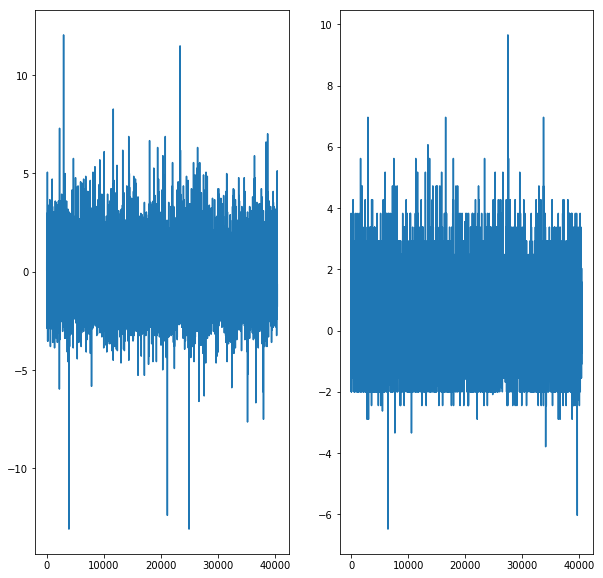

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].plot(diamonds1['depth'])
axs[1].plot(diamonds1['table'])

In [85]:
diamonds2 = diamonds1[(diamonds1['depth']>=-4 ) & (diamonds1['depth']<=4)]
diamonds2 = diamonds1[(diamonds1['table']>=-2 ) & (diamonds1['table']<=4)]

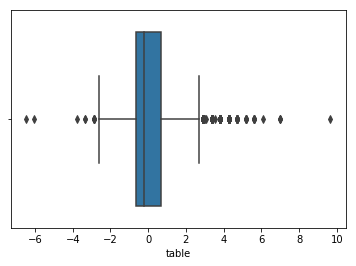

In [30]:
# outliers

import seaborn as sns
sns.boxplot(x=diamonds1['table'])

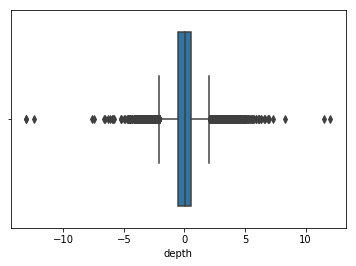

In [31]:
sns.boxplot(x=diamonds1['depth'])

In [35]:
diamonds2 = diamonds1[diamonds1.depth <5]
diamonds3 = diamonds2[diamonds2.depth>-5]


In [86]:
diamonds2

,carat,cut,color,clarity,depth,table,price
0,2.26,1,1,1,0.106170,-0.205764,12831
1,2.43,2,2,1,1.013798,-0.205764,16170
2,0.80,3,3,1,-0.522188,-0.205764,2797
3,0.40,1,3,8,1.083616,1.138849,630
4,0.31,1,1,3,-0.103283,-1.102173,698
...,...,...,...,...,...,...,...
40450,1.11,3,2,4,0.734528,1.587054,5315
40451,0.73,1,3,3,0.594893,-0.653969,2762
40452,1.26,2,6,5,-1.778904,1.138849,6855
40453,0.72,1,1,1,-0.242918,-0.653969,2297


In [87]:
X = diamonds2[['carat', 'cut', 'color', 'clarity', 'depth', 'table']]
y = diamonds2['price']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [89]:
models = {
    #"svm": LinearSVC(),
    #"logistic": LogisticRegression(solver='lbfgs', max_iter=2000),
    "forest": RandomForestRegressor(),
    #"ridge": Ridge(),
    #"svr": SVR(C=1.0, epsilon=0.2),
}

for modelName, model in models.items():
    print(f"Training model: {modelName}")
    model.fit(X_train, y_train)
    print(f"Training finished: {modelName}")

Training model: forest


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training finished: forest


In [90]:
diamond_model = LinearRegression()
lr = diamond_model.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[ 8174.33648309  -177.24400466  -107.4149912    222.07792353  -140.70101678
   -77.00511222]
-2734.05580797


In [91]:
pred = lr.predict(X_test)

In [92]:
scores = pd.DataFrame({
    "predicted":pred,
    "gt":y_test
})
scores["diff"] = np.abs(scores["predicted"]-scores["gt"])
scores["diff"].sum()/ len(y_test)
scores

,predicted,gt,diff
36123,556.279468,394,162.279468
33830,-71.269186,472,543.269186
18906,1280.178085,1646,365.821915
27607,191.893023,780,588.106977
33047,296.372021,739,442.627979
...,...,...,...
24105,1414.160777,1080,334.160777
35135,7861.082139,7477,384.082139
17579,5483.541958,4524,959.541958
22138,4158.813989,4893,734.186011


In [17]:
'''models = {
    #"svm": LinearSVC(),
    #"logistic": LogisticRegression(solver='lbfgs', max_iter=2000),
    "forest": RandomForestRegressor()
}

for modelName, model in models.items():
    print(f"Training model: {modelName}")
    model.fit(X_train, y_train)'''

'models = {\n    #"svm": LinearSVC(),\n    #"logistic": LogisticRegression(solver=\'lbfgs\', max_iter=2000),\n    "forest": RandomForestRegressor()\n}\n\nfor modelName, model in models.items():\n    print(f"Training model: {modelName}")\n    model.fit(X_train, y_train)'

In [93]:

kf = KFold(n_splits=2, shuffle=True, random_state=11)
scores = cross_val_score(models['forest'], X_train, y_train, scoring='r2', cv=kf, n_jobs=2)
name = str(models['forest'])
print(f'{name}: Average R-Squared Score:', np.mean(scores))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False): Average R-Squared Score: 0.963838570337


In [94]:
test = pd.read_csv('../input/test.csv')

In [95]:
test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.56,Ideal,I,VS2,62.1,54.0,5.30,5.33,3.30
1,1,1.05,Ideal,G,VS2,61.9,56.0,6.56,6.52,4.05
2,2,0.50,Premium,E,VS2,61.5,56.0,5.11,5.07,3.13
3,3,0.80,Ideal,F,VS1,62.8,56.0,5.91,5.96,3.73
4,4,0.54,Ideal,G,VS1,61.4,57.0,5.23,5.20,3.20


In [96]:
test['cut'] = test['cut'].apply(cutNormal)
test['color'] = test['color'].apply(colorNormal)
test['clarity'] = test['clarity'].apply(clarityNormal)


In [97]:
test1 = test.drop(['x', 'y', 'z'], axis=1)
test1.head()

,id,carat,cut,color,clarity,depth,table
0,0,0.56,1,6,3,62.1,54.0
1,1,1.05,1,1,3,61.9,56.0
2,2,0.50,3,5,3,61.5,56.0
3,3,0.80,1,3,5,62.8,56.0
4,4,0.54,1,1,5,61.4,57.0


In [98]:
columns = ['depth', 'table']
for col in columns:
    test1[col] = (test1[col] - np.mean(test1[col])) / np.std(test1[col]) 

test1.head()

,id,carat,cut,color,clarity,depth,table
0,0,0.56,1,6,3,0.241489,-1.537773
1,1,1.05,1,1,3,0.101972,-0.646693
2,2,0.50,3,5,3,-0.177064,-0.646693
3,3,0.80,1,3,5,0.729801,-0.646693
4,4,0.54,1,1,5,-0.246823,-0.201152


In [99]:
test2 = test1[test1.depth <5]
test3 = test2[test2.depth>-5]

In [100]:
test3

,id,carat,cut,color,clarity,depth,table
0,0,0.56,1,6,3,0.241489,-1.537773
1,1,1.05,1,1,3,0.101972,-0.646693
2,2,0.50,3,5,3,-0.177064,-0.646693
3,3,0.80,1,3,5,0.729801,-0.646693
4,4,0.54,1,1,5,-0.246823,-0.201152
...,...,...,...,...,...,...,...
13480,13480,0.70,3,2,4,-1.921035,1.135469
13481,13481,0.55,1,1,6,0.381007,-1.983314
13482,13482,1.54,1,1,4,-0.177064,-1.092233
13483,13483,0.30,3,1,1,0.660042,-1.092233


In [101]:
d1 = {modelName:model.predict(test3[["carat", "cut", "color", "clarity", "depth", "table"]]) for modelName, model in models.items()}

df1 = pd.DataFrame(d1)
df1['id']=test3['id']
new = df1[['id','forest']]
new.rename(columns={"forest": "price"}, inplace=True)
new.head()

,id,price
0,0.0,1315.8
1,1.0,6520.7
2,2.0,1695.9
3,3.0,3671.1
4,4.0,1684.0


In [102]:
new.to_csv('../output/test4.csv', index=False)


In [79]:
models = {
    #"svm": LinearSVC(),
    #"logistic": LogisticRegression(solver='lbfgs', max_iter=2000),
    #"forest": RandomForestRegressor(),
    "ridge": Ridge(),
    #"svr": SVR(C=1.0, epsilon=0.2),
}

for modelName, model in models.items():
    print(f"Training model: {modelName}")
    model.fit(X_train, y_train)
    print(f"Training finished: {modelName}")

Training model: ridge
Training finished: ridge


In [80]:

kf = KFold(n_splits=2, shuffle=True, random_state=11)
scores = cross_val_score(models['ridge'], X_train, y_train, scoring='r2', cv=kf, n_jobs=2)
name = str(models['ridge'])
print(f'{name}: Average R-Squared Score:', np.mean(scores))

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001): Average R-Squared Score: 0.868634603955


In [88]:

d1 = {modelName:model.predict(test1[["carat", "cut", "color", "clarity", "depth", "table"]]) for modelName, model in models.items()}

df1 = pd.DataFrame(d1)
df1['id']=test1['id']
new = df1[['id','ridge']]
new.rename(columns={"ridge": "price"}, inplace=True)
new.head()

new.set_index('id', inplace=True)
new.head()

,price
id,
0,1785.878728
1,6267.113727
2,1026.822753
3,4367.506265
4,2551.236201


In [89]:
new.to_csv('../output/prueba2.csv')

In [42]:
models = {
    #"svm": LinearSVC(),
    "logistic": LogisticRegression(solver='lbfgs', max_iter=2000),
    #"forest": RandomForestRegressor(),
    #"ridge": Ridge(),
    #"svr": SVR(C=1.0, epsilon=0.2),
}

for modelName, model in models.items():
    print(f"Training model: {modelName}")
    model.fit(X_train, y_train)
    print(f"Training finished: {modelName}")

Training model: logistic


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training finished: logistic


In [43]:

kf = KFold(n_splits=2, shuffle=True, random_state=11)
scores = cross_val_score(models['logistic'], X_train, y_train, scoring='r2', cv=kf, n_jobs=2)
name = str(models['logistic'])
print(f'{name}: Average R-Squared Score:', np.mean(scores))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False): Average R-Squared Score: 0.386070082686


In [95]:
models = {
    #"svm": LinearSVC(),
    #"logistic": LogisticRegression(solver='lbfgs', max_iter=2000),
    #"forest": RandomForestRegressor(),
    #"ridge": Ridge(),
    "svr": SVR(C=1.0, epsilon=0.2)
}

for modelName, model in models.items():
    print(f"Training model: {modelName}")
    model.fit(X_train, y_train)
    print(f"Training finished: {modelName}")

Training model: svr


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training finished: svr


In [96]:
kf = KFold(n_splits=2, shuffle=True, random_state=11)
scores = cross_val_score(models['svr'], X_train, y_train, scoring='r2', cv=kf, n_jobs=2)
name = str(models['svr'])
print(f'{name}: Average R-Squared Score:', np.mean(scores))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False): Average R-Squared Score: -0.0776059916604


In [25]:
models = {
    #"svm": LinearSVC(),
    #"logistic": LogisticRegression(solver='lbfgs', max_iter=2000),
    #"forest": RandomForestRegressor(),
    #"ridge": Ridge(),
    #"svr": SVR(C=1.0, epsilon=0.2), 
    #"MLPClassifier": MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1),
    
}

for modelName, model in models.items():
    print(f"Training model: {modelName}")
    model.fit(X_train, y_train)
    print(f"Training finished: {modelName}")

Training model: forest


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MemoryError: could not allocate 4950327296 bytes